# All imports necessary

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [5]:
from sklearn.pipeline import Pipeline

In [6]:
from sklearn.compose import ColumnTransformer

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.metrics import auc

In [13]:
from sklearn.metrics import roc_curve

In [14]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [15]:
%matplotlib inline

sns.set(font_scale=2)

# Auxiliary classes

In [16]:
class CustomClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base):
        self.base = base

    def fit(self, X, y=None):
        self.base.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.base.predict(X)

    def predict_proba(self, X, y=None):
        return self.base.predict_proba(X)

    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

    def fit_predict_proba(self, X, y=None):
        self.fit(X, y)
        return self.predict_proba(X)

    def score(self, X, y, sample_weight=None):
        return self.base.score(X, y, sample_weight)

In [17]:
class CustomLabelBinarizer(TransformerMixin):
    def __init__(self, neg_label=0, pos_label=1, sparse_output=False):
        self.binarizer = LabelBinarizer(neg_label, pos_label, sparse_output)

    def transform(self, X, y=None, **kwargs):
        return self.binarizer.transform(y).ravel()

    def fit(self, X, y=None, **kwargs):
        self.binarizer.fit(y)

    def fit_transform(self, X, y=None, **kwargs):
        self.binarizer.fit(y)
        return self.binarizer.transform(y).ravel()

In [18]:
class CustomLabelEncoder(TransformerMixin):
    def __init__(self):
        self.encoder = LabelEncoder()

    def transform(self, X, y=None, **kwargs):
        return self.encoder.transform(y)

    def fit(self, X, y=None, **kwargs):
        self.encoder.fit(y)

    def fit_transform(self, X, y=None, **kwargs):
        self.encoder.fit(y)
        return self.encoder.transform(y)

# Load the data

# Read the data and add some gaps

In [19]:
data = pd.read_csv('train.csv', sep=',')

In [20]:
test_data = pd.read_csv('test.csv', sep=',')

In [21]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
VASK0,108,47,93,62,40,185,115,233,7,10
VASK1,276,132,172,104,43,259,150,182,161,121
VASK2,224,197,193,169,87,224,241,179,272,200
VASK3,196,236,226,188,110,295,228,183,147,266
VASK4,195,188,232,140,99,261,198,185,134,230
VBID0,132,81,33,75,11,12,54,18,172,118
VBID1,181,146,128,165,66,164,254,181,273,185
VBID2,253,193,168,151,77,249,203,188,182,173
VBID3,207,169,145,206,155,231,169,216,363,198
VBID4,185,192,140,105,364,239,189,165,194,157


In [22]:
df = data.copy()
test_df = test_data.copy()

In [23]:
df['mul0'] = df['VASK0'] * df['VBID0']
df['mul1'] = df['VASK1'] * df['VBID1']
df['mul2'] = df['VASK2'] * df['VBID2']
df['mul3'] = df['VASK3'] * df['VBID3']
df['mul4'] = df['VASK4'] * df['VBID4']
df['mul0_PREV'] = df['VASK0_PREV'] * df['VBID0_PREV']
df['mul1_PREV'] = df['VASK1_PREV'] * df['VBID1_PREV']
df['mul2_PREV'] = df['VASK2_PREV'] * df['VBID2_PREV']
df['mul3_PREV'] = df['VASK3_PREV'] * df['VBID3_PREV']
df['mul4_PREV'] = df['VASK4_PREV'] * df['VBID4_PREV']

test_df['mul0'] = test_df['VASK0'] * test_df['VBID0']
test_df['mul1'] = test_df['VASK1'] * test_df['VBID1']
test_df['mul2'] = test_df['VASK2'] * test_df['VBID2']
test_df['mul3'] = test_df['VASK3'] * test_df['VBID3']
test_df['mul4'] = test_df['VASK4'] * test_df['VBID4']
test_df['mul0_PREV'] = test_df['VASK0_PREV'] * test_df['VBID0_PREV']
test_df['mul1_PREV'] = test_df['VASK1_PREV'] * test_df['VBID1_PREV']
test_df['mul2_PREV'] = test_df['VASK2_PREV'] * test_df['VBID2_PREV']
test_df['mul3_PREV'] = test_df['VASK3_PREV'] * test_df['VBID3_PREV']
test_df['mul4_PREV'] = test_df['VASK4_PREV'] * test_df['VBID4_PREV']

In [24]:
df.drop('Y', axis=1, inplace = True)
df['Y'] = data['Y']

In [25]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186590 entries, 0 to 186589
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   VASK0       186590 non-null  int64
 1   VASK1       186590 non-null  int64
 2   VASK2       186590 non-null  int64
 3   VASK3       186590 non-null  int64
 4   VASK4       186590 non-null  int64
 5   VBID0       186590 non-null  int64
 6   VBID1       186590 non-null  int64
 7   VBID2       186590 non-null  int64
 8   VBID3       186590 non-null  int64
 9   VBID4       186590 non-null  int64
 10  VASK0_PREV  186590 non-null  int64
 11  VASK1_PREV  186590 non-null  int64
 12  VASK2_PREV  186590 non-null  int64
 13  VASK3_PREV  186590 non-null  int64
 14  VASK4_PREV  186590 non-null  int64
 15  VBID0_PREV  186590 non-null  int64
 16  VBID1_PREV  186590 non-null  int64
 17  VBID2_PREV  186590 non-null  int64
 18  VBID3_PREV  186590 non-null  int64
 19  VBID4_PREV  186590 non-null  int64
 20  mul0

In [26]:
#profiling_report0 = pandas_profiling.ProfileReport(df[df.Y == 0])
#profiling_report1 = pandas_profiling.ProfileReport(df[df.Y == 1])

In [27]:
#profiling_report0

In [28]:
#profiling_report1

In [29]:
features = df.columns[:-1].values.tolist()

In [30]:
target = 'Y'

# Split the data into train and test

In [31]:
X, y = df[features], df[target]

In [32]:
y = CustomLabelBinarizer().fit_transform(X, CustomLabelEncoder().fit_transform(X, y))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Pipeline

In [34]:
features_pipeline = Pipeline([
    ('scale', MinMaxScaler()),
    ('transform', QuantileTransformer(output_distribution='normal'))
])

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', features_pipeline, features),
    ]
)

In [36]:
classifier_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('classify', CustomClassifier(base=LogisticRegression()))
    ]
)

In [37]:
classifier_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler()),
                                                                  ('transform',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['VASK0', 'VASK1', 'VASK2',
                                                   'VASK3', 'VASK4', 'VBID0',
                                                   'VBID1', 'VBID2', 'VBID3',
                                                   'VBID4', 'VASK0_PREV',
                                                   'VASK1_PREV', 'VASK2_PREV',
                                                   'VASK3_PREV', 'VASK4_PREV',
                                                   'VBID0_PREV', 'VBID1_PREV',
   

In [38]:
y_pred = classifier_pipeline.predict_proba(X_test)

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])

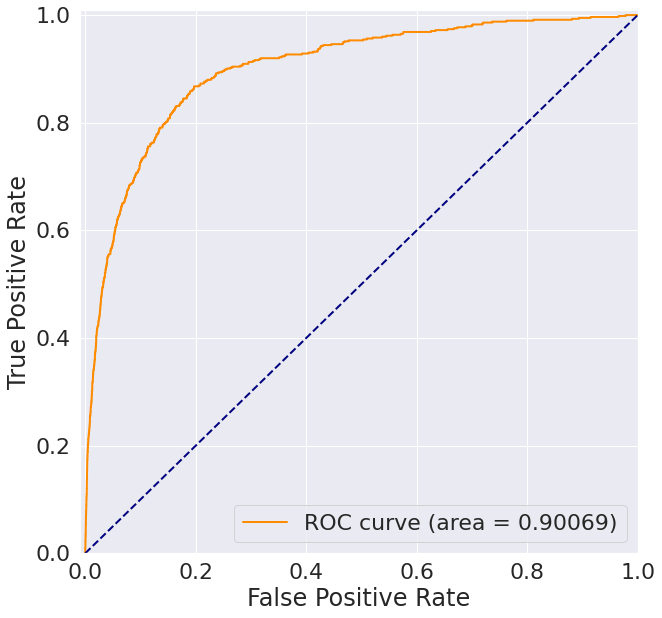

In [40]:
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.5f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [41]:
#print(cross_val_score(classifier_pipeline, X_train, y_train, cv=5))

In [42]:
test_pred = classifier_pipeline.predict_proba(test_df)

In [43]:
z = test_pred[:, 1]

In [44]:
with open('prediction.csv', 'w') as file:
        file.write('Y_PRED' + '\n')
        for i in z:
             file.write(str(i) + '\n')